<a href="https://colab.research.google.com/github/bruno-camara/bin_packing_complexity_analysis/blob/main/TP_complexite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Complexité
Auteurs: 
- Bruno Carneiro Camara
- Youssef Dinar

# **Problème Bin Packing**

- Soient n objets, chacun ayant son propre poids wi, et 
autant de boites que nécessaire. Les boites ont toutes la 
même capacité c. Comment mettre ces n objets dans un 
nombre minimal de boites, avec pour seule contrainte que 
pour chaque boite, la somme des poids des objets que l’on y 
range ne dépasse pas la capacité c.
- On peut considérer que chaque objet a un poids wi 
inférieur à la capacité c de chaque boite. Pourquoi ?
- On peut donc considérer que c=1 et que 0<wi⩽1

## Applications
- Charger des véhicules avec poids limite
- Charger des containers avec volume maximum
- Rangement de fichiers sur un support informatique
- Généralisation possible avec volumes des boites 
différents, coûts des objets, ...
- Généralisation possible en 2D ou 3D :
  - Découpe de matière (2D)
  - Placement dans un entrepôt (2D ou 3D)
  - ...

## Algorithmes mis en œuvre
- Next Fit
- First Fit
- Best Fit
- Worst Fit
- First Fit Decreasing
- Best Fit Decreasing

## Import Libraries and Files

In [ ]:
import pandas as pd
import os
import time
from google.colab import files
import matplotlib.pyplot as plt
import statistics

In [ ]:
# To upload the files, run this cell and select the files from the folder /Augmented_Non_IRUP_and_Augmented_IRUP_Instances/Difficult_Instances/AI/
uploaded = files.upload()

Saving 201_2500_DI_0.txt to 201_2500_DI_0.txt
Saving 201_2500_DI_1.txt to 201_2500_DI_1.txt
Saving 201_2500_DI_2.txt to 201_2500_DI_2.txt
Saving 201_2500_DI_3.txt to 201_2500_DI_3.txt
Saving 201_2500_DI_4.txt to 201_2500_DI_4.txt
Saving 201_2500_DI_5.txt to 201_2500_DI_5.txt
Saving 201_2500_DI_6.txt to 201_2500_DI_6.txt
Saving 201_2500_DI_7.txt to 201_2500_DI_7.txt
Saving 201_2500_DI_8.txt to 201_2500_DI_8.txt
Saving 201_2500_DI_9.txt to 201_2500_DI_9.txt
Saving 201_2500_DI_10.txt to 201_2500_DI_10.txt
Saving 201_2500_DI_11.txt to 201_2500_DI_11.txt
Saving 201_2500_DI_12.txt to 201_2500_DI_12.txt
Saving 201_2500_DI_13.txt to 201_2500_DI_13.txt
Saving 201_2500_DI_14.txt to 201_2500_DI_14.txt
Saving 201_2500_DI_15.txt to 201_2500_DI_15.txt
Saving 201_2500_DI_16.txt to 201_2500_DI_16.txt
Saving 201_2500_DI_17.txt to 201_2500_DI_17.txt
Saving 201_2500_DI_18.txt to 201_2500_DI_18.txt
Saving 201_2500_DI_19.txt to 201_2500_DI_19.txt
Saving 201_2500_DI_20.txt to 201_2500_DI_20.txt
Saving 201_2

## Next Fit

In [ ]:
def nextfit(weight, c):
    if (len(weight)==0):
        return 0
    res = 1 #nombre de boite utiliser
    rem = c #capacite qui reste
    for w in range(len(weight)):
        if rem >= weight[w]:
            rem = rem - weight[w]
        else:
            res += 1
            rem = c - weight[w]
    return res

### Complexité

Pire = Meilleur = O(n)

## First Fit

In [ ]:
def firstfit(weight, c):
    
    L = [c]
    l = len(L)
    res = 1
    for i in range(len(weight)):
        k= 0
        e = 0
        while e == 0 and k< len(L):
            if weight[i]<= L[k]:
                L[k] = L[k] - weight[i]
                e = 1
            else:
                k +=1
        if k == len(L):
            m = c - weight[i]
            L.append(m)
            res += 1
    return res

def firstfit_decreasing(weight, c):
    weight.sort(reverse = True)
    return firstfit(weight,c)

### Complexité First Fit

Pire des cas = n² (pour chaque valeur de i, on parcourt n fois la boucle while)

Meilleur des cas = n

### Complexité First Fit Decreasing

Pire = O(n²)

Meilleur = O(n)

## Best Fit

In [ ]:
def bestfit(weight, c):
    if (len(weight)==0):
        return 0
    remaining_weight = [c] #capacite qui reste
    for w in range(len(weight)):
        remaining_weight.sort() #trier
        for box in range(len(remaining_weight)):
            if (remaining_weight[box] >= weight[w]):
                remaining_weight[box] = remaining_weight[box] - weight[w]
                break
            if (box == len(remaining_weight) - 1):
                remaining_weight.append(c - weight[w])
    return len(remaining_weight)

def bestfit_decreasing(weight, c):
    weight.sort(reverse=True)
    return bestfit(weight, c)

### Complexité Best Fit
- Complexité pire cas O(n²)
- Complexité meilleur cas O(n)
- Complexité de l'algorithme  de tri du Python (Timsort): pire cas: O(nlog(n)), meilleur cas: O(n)

### Complexité Best Fit Decreasing
- Complexité pire cas O(n²)
- Complexité meilleur cas O(n)

## Worst Fit

In [ ]:
def worstfit(weight, c):
    L=[c]
    l = len(L)
    res = 1
    for i in range(len(weight)):
        if weight[i] <= max(L):
            j = L.index(max(L))
            L[j] = L[j] - weight[i]
        else:
            m =  c - weight[i]
            L.append(m)
            res += 1
    return res
        
#ComplexitÃ©:
#Pire = Meilleur = n

#Temps d'Ã©xecution:
weight = []
c= 10

### Complexité

Pire = Meilleur = n

## Comparaison avec solution optimal

In [ ]:
sol_opt = pd.read_excel('Solutions.xlsx', sheet_name="Augmented IRUP Instances")
sol_opt

,Name,Best LB,Best UB,Status,Comment,Selected
0,201_2500_DI_0.txt,65,65,Solved,NaN,1
1,201_2500_DI_1.txt,65,65,Solved,NaN,1
2,201_2500_DI_2.txt,65,65,Solved,NaN,1
3,201_2500_DI_3.txt,65,65,Solved,NaN,1
4,201_2500_DI_4.txt,65,65,Solved,NaN,1
...,...,...,...,...,...,...
245,1002_80000_DI_45.txt,332,333,Open,Expected OPT = 332,1
246,1002_80000_DI_46.txt,332,333,Open,Expected OPT = 332,1
247,1002_80000_DI_47.txt,332,333,Open,Expected OPT = 332,1
248,1002_80000_DI_48.txt,332,333,Open,Expected OPT = 332,1


## Main

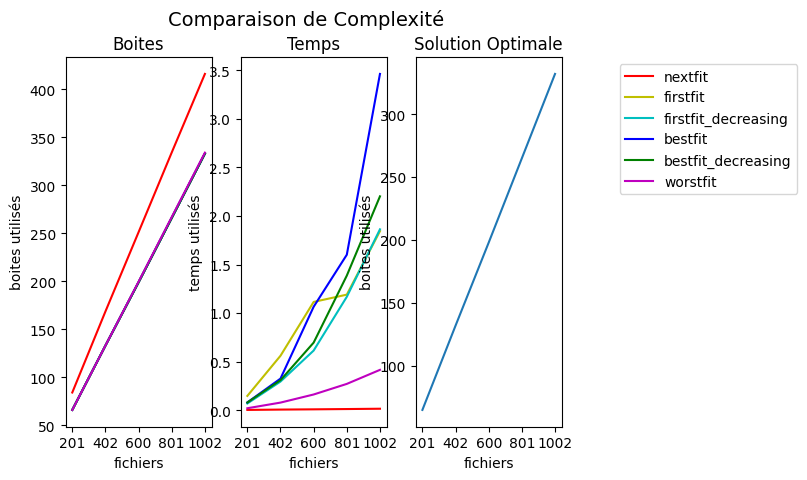

In [ ]:
def import_config(nom_fichier):
    fichier = open(nom_fichier, "r")
    l = fichier.readline()
    n = int(l) #nombre d'objet
    l = fichier.readline() 
    c = int(l) #capacité de la boite en poid
    weight=[]
    for i in range(n):
        l = fichier.readline()
        weight.append(int(l))
    fichier.close()
    return (n, c, weight)

# weight = [2, 5, 4, 7, 1, 3, 8]
# c = 10
l = ['201', '402', '600', '801', '1002']
funcs = [[nextfit, 'r'], [firstfit, 'y'], [firstfit_decreasing, 'c'], [bestfit, 'b'], [bestfit_decreasing, 'g'], [worstfit, 'm']]

for func in funcs:
  temps_execution = []
  mean_boites = []
  for i in l:
    files = [filename for filename in uploaded if filename.startswith(i)]
    temp_total = 0
    boites = []
    for file in files:
      [_, c, weight] = import_config(file)

      start_nf = time.time()
      boites.append(func[0](weight, c))
      end_nf = time.time()
      temp_total = temp_total + end_nf - start_nf

    temps_execution.append(temp_total)
    mean_boites.append(statistics.mean(boites))
    #print(mean_boites)

  plt.subplot(1, 3, 1) # row 1, col 2 index 1
  plt.plot(l, mean_boites, c=func[1], label='data')
  plt.xlabel('fichiers')
  plt.ylabel('boites utilisés')
  title = 'Boites'
  plt.title(title)

  plt.subplot(1, 3, 2) # row 1, col 2 index 1
  plt.plot(l, temps_execution, c=func[1], label='data')
  plt.xlabel('fichiers')
  plt.ylabel('temps utilisés')
  title = 'Temps'
  plt.title(title)

legend = ["nextfit", "firstfit", "firstfit_decreasing", "bestfit", "bestfit_decreasing", "worstfit"]
plt.legend(legend, bbox_to_anchor=(2.55, 1.0), loc='upper left')

plt.subplot(1, 3, 3) # row 1, col 2 index 3
plt.plot(l, sol_opt['Best LB'].unique())
plt.xlabel('fichiers')
plt.ylabel('boites utilisés')
plt.title('Solution Optimale')

plt.plot()
plt.suptitle("Comparaison de Complexité", fontsize=14)
plt.show()

## Conclusion

Dans ce TP sur la complexité algorithmique, nous avons traité un problème qui fait rappeler un peu le problème du sac-à-dos: nous disposons d’une liste d’objets, chacun ayant un poids donné, que nous voulons mettre dans un nombre minimal de boîtes, chacune de celles-ci ayant une capacité notée c. Bien évidemment, il existe deux différences majeures entre ce problème et celui du sac à dos, d’une part le fait que nous disposons dans ce cas, éventuellement, de plusieurs boîtes, et d’autre part le fait que les objets ne sont pas caractérisés par des utilités vu que l’enjeu ici n’est pas de maximiser l’utilité par sac mais plutôt d’avoir le minimum de nombre de boîtes.

Nous avons implémenté 5 algorithmes(sans compter celui qui a déjà été implémenté) qui représentent chacun une méthode d’attribution des objets à une ou plusieurs boîtes. Chaque algorithme a été caractérisé par une complexité au pire des cas et une autre au meilleur des cas.

Par la suite, nous avons calculé les temps d'exécution de chaque algorithme. Vu les fluctuations qui ont lieu en calculant cette durée pour chaque instance, il était judicieux par la suite de regrouper les instances par nombre d’objets mis en jeu puis de calculer le temps cumulé sur chaque catégorie. En faisant ainsi, nous obtenons une augmentation quasi linéaire ou exponentielle du temps d'exécution en fonction du nombre d’objets.

Ensuite, nous avons examiné la variation du nombre de boîtes nécessaires par nombre d'objets  et par algorithme utilisé. A notre grande surprise, nous obtenons quatres courbes qui sont confondues, alors que la méthode NextFit donne une courbe en rouge bien séparée des autres.

En évaluant enfin l’erreur, il nous semble que la méthode NextFit déjà évoquée est la seule qui donne des résultats loin d'être satisfaisants vis-à-vis les résultats fournis par la solution exacte. Nous obtenons, encore une  fois, des courbes confondues pour les 5 autres méthodes avec la solution optimale, chose que nous avons mise en évidence en traçant la courbe correspondant à la solution optimale séparément.